# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS

## Week 1 - ODE in  1D

In [17]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

## Euler Method

The Euler method is the simplest method to solve first order ODE's:

$$\frac{dy(t)}{dt} = f(y,t), \, y(0) = y_{0}$$.

Using a Taylor series, one can verify that

$$y(t + \Delta t) = y(t) + f(y, t) \Delta t$$

or

$$y_{i+1} = y_{i} + f(y_{i}, t_{i}) \Delta t$$

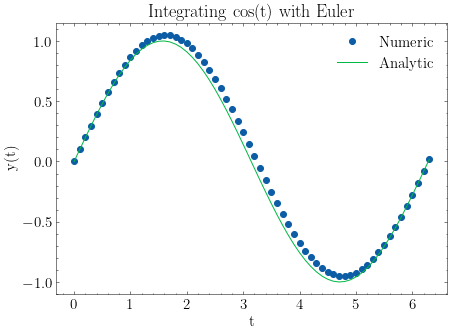

In [18]:
# Euler method

dt = 0.1
t = np.arange(0, 2*np.pi + dt, dt)
N = len(t)
y = np.zeros(N)
y[0] = 0

def f(t):
    "Integrating cos(t). We expect sin(t) as result."
    return np.cos(t)

for i in range(N-1):
    y[i+1] = y[i] + f(t[i])*dt

plt.plot(t, y, marker='o', linestyle='', label="Numeric")
plt.plot(t, np.sin(t), label="Analytic")
plt.title('Integrating cos(t) with Euler')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

## Simultaneous first order ODE's

\begin{align}
\frac{dx(t)}{dt} &= f_x(x, y, t), \\
\frac{dy(t)}{dt} &= f_y(x, y, t)
\end{align}

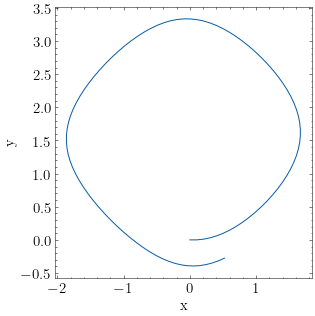

In [19]:
dt = 0.1
t = np.arange(0, 10.0 + dt, dt)
N = len(t)
x = np.zeros(N)
y = np.zeros(N)

def f(r, t):
    x, y = r
    fx = np.cos(y)
    fy = np.sin(x)
    return np.array([fx, fy])

def euler(f, x, t, dt):
    """Compute the next step using Euler's Method."""
    x = x + dt*f(x, t)
    return x

for i in range(N-1):
    x[i+1], y[i+1] = euler(f, (x[i], y[i]), t[i], dt)
    
plt.plot(x, y)
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2nd order ODE's

A 2nd order ODE such as

$$ \frac{d^2 r(t)}{dt^2} = f(v,r,t)$$

can be solved by decoupling into two 1st order ODE's:

$$ \frac{d r(t)}{dt} = v(t) $$

$$ \frac{d v(t)}{dt} = f(v,r,t) $$

Applying the Euler method to both equations we have:

$$ r_{i+1} = r_{i} + v_{i} \Delta t $$

$$ v_{i+1} = v_i + f(r_i, t_i) \Delta t $$

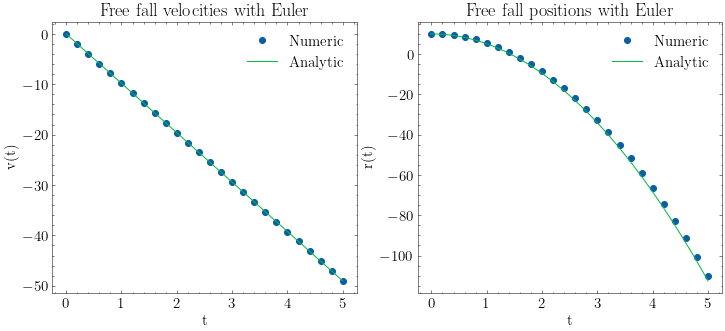

In [20]:
# Solving a free fall without air friction using Euler method

dt = 0.1
t = np.arange(0, 5.0 + dt, dt)
N = len(t)
g = 9.81

r = np.zeros(N)
v = np.zeros(N)

r[0] = 10.0
v[0] = 0.0

def f(g=9.81):
    return -g

for i in range(N - 1):
    v[i+1] = v[i] + f()*dt
    r[i+1] = r[i] + v[i]*dt

plt.figure(figsize=(12,5))    

plt.subplot(1,2,1)
plt.plot(t[::2], v[::2], marker='o', linestyle='',label="Numeric")
plt.plot(t, -g*t, label="Analytic")
plt.xlabel('t')
plt.ylabel('v(t)')
plt.title('Free fall velocities with Euler')
plt.legend()

plt.subplot(1,2,2)
plt.plot(t[::2], r[::2], marker='o', linestyle='', label="Numeric")
plt.plot(t, 10.0 - 0.5*g*t**2, label="Analytic")
plt.xlabel('t')
plt.ylabel('r(t)')
plt.title('Free fall positions with Euler')
plt.legend()

plt.show()

## Modified Euler method

A better approximation is to use $v_{i+1}$ instead of $v_{i}$ when integrating the position:

$$ r_{i+1} = r_{i} + v_{i + 1} \Delta t $$

$$ v_{i+1} = v_i + f(r_i, t_i) \Delta t $$

this yields a more stable solution, and is know as modified Euler method, or Euler-Cromer, or last-pass approximation.

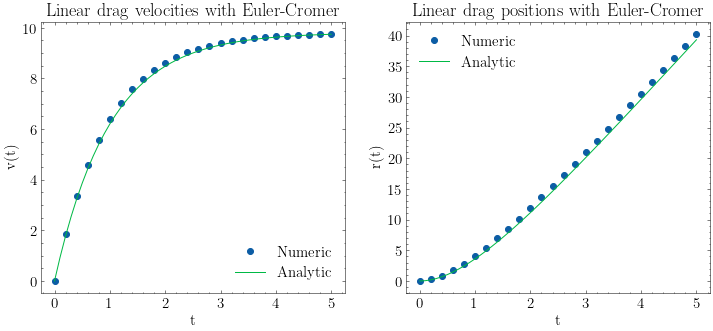

In [21]:
# Solving a free fall with linear drag with Euler-Cromer

dt = 0.1
t = np.arange(0, 5.0 + dt, dt)
N = len(t)

m = 1.0
b = 1.0
g = 9.81
v_ter = m*g/b 
vy0 = 0.0
r0 = 0.0
tau = m/b

r = np.zeros(N)
v = np.zeros(N)

r[0] = r0
v[0] = vy0

def f(v, m=1, b=1, g=9.81):
    return g - b*v/m

def v_exact(t, v_ter, vy0, tau):
    return v_ter + (vy0 - v_ter)*np.exp(-t/tau)

def r_exact(t, v_ter, r0, tau):
    return r0 + v_ter * t + (vy0 - v_ter)*tau*(1 - np.exp(-t/tau))


for i in range(N - 1):
    v[i+1] = v[i] + f(v[i])*dt
    r[i+1] = r[i] + v[i + 1]*dt


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(t[::2], v[::2], marker='o', linestyle='',label="Numeric")
plt.plot(t, v_exact(t, v_ter, vy0, tau), label="Analytic")
plt.xlabel('t')
plt.ylabel('v(t)')
plt.title('Linear drag velocities with Euler-Cromer')
plt.legend()

plt.subplot(1,2,2)
plt.plot(t[::2], r[::2], marker='o', linestyle='', label="Numeric")
plt.plot(t, r_exact(t, v_ter, r0, tau), label="Analytic")
plt.xlabel('t')
plt.title('Linear drag positions with Euler-Cromer')
plt.ylabel('r(t)')
plt.legend()

plt.show()

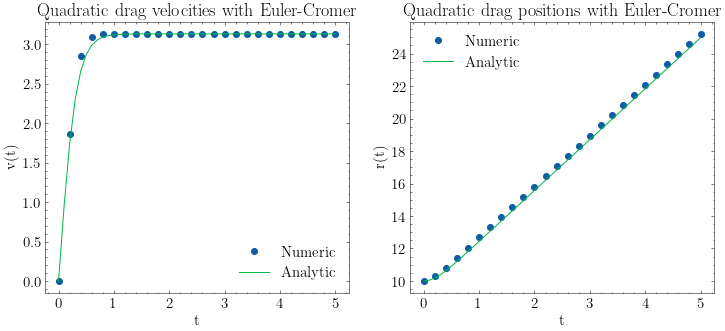

In [22]:
# Solving a free fall with quadratic drag with Euler-Cromer

dt = 0.1
t = np.arange(0, 5.0 + dt, dt)
N = len(t)

m = 1.0
c = 1.0
g = 9.81
v_ter = np.sqrt(m*g/c) 
vy0 = 0.0
r0 = 10.0
tau = m/b

r = np.zeros(N)
v = np.zeros(N)

r[0] = r0
v[0] = vy0

def f(v, m=1, b=1, g=9.81):
    return g - b*v*abs(v)/m


def v_quad_exact(t):
    return v_ter*np.tanh(g*t/v_ter)

def r_quad_exact(t):
    return r0 + ((v_ter)**2)*np.log(np.cosh(g*t/v_ter))/g


for i in range(N - 1):
    v[i+1] = v[i] + f(v[i])*dt
    r[i+1] = r[i] + v[i+1]*dt


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(t[::2], v[::2], marker='o', linestyle='',label="Numeric")
plt.plot(t, v_quad_exact(t), label="Analytic")
plt.xlabel('t')
plt.ylabel('v(t)')
plt.title('Quadratic drag velocities with Euler-Cromer')
plt.legend()

plt.subplot(1,2,2)
plt.plot(t[::2], r[::2], marker='o', linestyle='', label="Numeric")
plt.plot(t, r_quad_exact(t), label="Analytic")
plt.xlabel('t')
plt.ylabel('r(t)')
plt.title('Quadratic drag positions with Euler-Cromer')
plt.legend()

plt.show()

## Generalizing the problem

We can generalize the problem we've been solving as

\begin{equation}
m \frac{d^2 r}{dt^2} = -mg - c |v|^{b-1} v,
\end{equation}

where $b = 1$ (linear air resistance) or $b = 2$ (quadratic air resistance). It is easy to verify that these problems have a terminal velocity:

\begin{equation}
\frac{d^2 r}{dt^2} = -g\left(1 + \frac{c}{mg} |v|^{b-1} v \right) = -g\left(-1 + \tilde{v}^b \right),
\end{equation}

where

\begin{equation}
\tilde{v} = \frac{v}{v_{ter}}, \, v_{ter} = -\left(\frac{mg}{c}\right)^{1/b}.
\end{equation}

We can proceed to make our equation dimensionless by defining $t = a \tilde{t}$:

\begin{equation}
\frac{d v}{dt} = -g\left(1 + \tilde{v}^b \right),
\end{equation}

\begin{equation}
\frac{v_{ter}}{a g} \frac{d \tilde{v}}{d \tilde{t}} = -\left(1 + \tilde{v}^b \right),
\end{equation}

Thus $a = v_{ter}/g$ and we arrive:

\begin{equation}
\frac{d \tilde{v}}{d \tilde{t}} = -\left(1 + \tilde{v}^b \right),
\end{equation}

Our position equation can be made dimensionless in a similar fashion defining $y = b \tilde{y}$ :

\begin{equation}
\frac{d y}{d t} = v,
\end{equation}

\begin{equation}
\frac{b g}{v_{ter}} \frac{d \tilde{y}}{d \tilde{t}} = \tilde{v}\, v_{ter},
\end{equation}

\begin{equation}
\frac{b g}{v_{ter}^2} \frac{d \tilde{y}}{d \tilde{t}} = \tilde{v}.
\end{equation}

Then,

\begin{equation}
\frac{d \tilde{y}}{d \tilde{t}} = \tilde{v},
\end{equation}

by $b = v_{ter}^2 / g$. Summing up, our problem is to solve:

\begin{align}
\frac{d \tilde{v}}{d \tilde{t}} &= -(1 + \tilde{v}^b) \\
\frac{d \tilde{y}}{d \tilde{t}} &= \tilde{v}
\end{align}

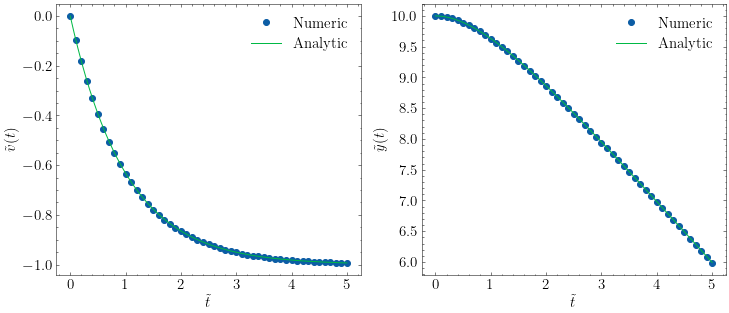

In [23]:
# Linear air resistance

dt = 0.01
t = np.arange(0, 5.0 + dt, dt)
N = len(t)

m = 1.0
c = 1.0
g = 9.81
b = 1  # Linear air resistance
v_ter = -(m*g/c)**(1/b)

vy0 = 0.0
r0 = 10.0

r = np.zeros(N)
v = np.zeros(N)

r[0] = r0
v[0] = vy0


def f(v, b):
    return -(1 + v*abs(v)**(b-1))

def v_linear_exact(t, vy0, v_ter):
    v0_tilde = vy0/v_ter
    return (1 + v0_tilde)*np.exp(-t) - 1

def r_linear_exact(t, r0, vy0, v_ter):
    g = 9.81
    v0_tilde = vy0/v_ter
    r0_tilde = (r0*g)/(v_ter**2)
    return r0 + (1 + v0_tilde)*(1 - np.exp(-t)) - t

for i in range(N-1):
    v[i+1] = v[i] + f(v[i], b)*dt
    r[i+1] = r[i] + v[i + 1]*dt


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)    
plt.plot(t[::10], v[::10], marker='o', linestyle='',label="Numeric")
plt.plot(t, v_linear_exact(t, vy0, v_ter), label="Analytic")
plt.xlabel(r'$\tilde{t}$')
plt.ylabel(r'$\tilde{v}(t)$')
plt.legend()

plt.subplot(1,2,2)
plt.plot(t[::10], r[::10], marker='o', linestyle='', label="Numeric")
plt.plot(t, r_linear_exact(t, r0, vy0, v_ter), label="Analytic")
plt.xlabel(r'$\tilde{t}$')
plt.ylabel(r'$\tilde{y}(t)$')
plt.legend()
plt.show()

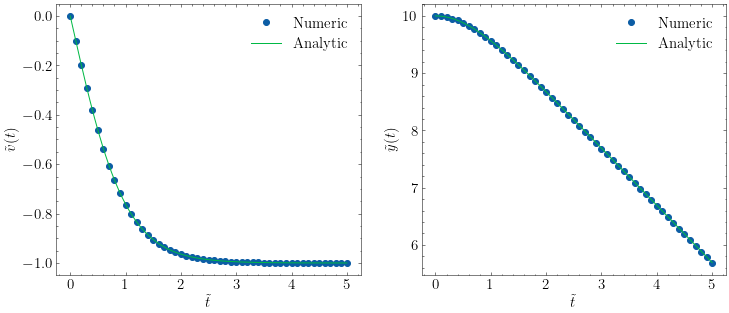

In [24]:
# Quadratic air resistance

dt = 0.01
t = np.arange(0, 5.0 + dt, dt)
N = len(t)

m = 1.0
c = 1.0
g = 9.81
b = 2  # Quadratic air resistance
v_ter = -np.sqrt((m*g/c))

vy0 = 0.0
r0 = 10.0

r = np.zeros(N)
v = np.zeros(N)

r[0] = r0
v[0] = vy0

def f(v, b):
    return -(1 + v*abs(v)**(b-1))

def v_quad_exact(t, vy0):
    return np.tanh(np.arctanh(vy0) - t)

def r_quad_exact(t, r0):
    return r0 - np.log(np.cosh(t))

for i in range(N-1):
    v[i+1] = v[i] + f(v[i], b)*dt
    r[i+1] = r[i] + v[i + 1]*dt


plt.figure(figsize=(12,5))

plt.subplot(1,2,1) 
plt.plot(t[::10], v[::10], marker='o', linestyle='',label="Numeric")
plt.plot(t, v_quad_exact(t, vy0), label="Analytic")
plt.xlabel(r'$\tilde{t}$')
plt.ylabel(r'$\tilde{v}(t)$')
plt.legend()

plt.subplot(1,2,2)
plt.plot(t[::10], r[::10], marker='o', linestyle='', label="Numeric")
plt.plot(t, r_quad_exact(t, r0), label="Analytic")
plt.xlabel(r'$\tilde{t}$')
plt.ylabel(r'$\tilde{y}(t)$')
plt.legend()
plt.show()

## Energies

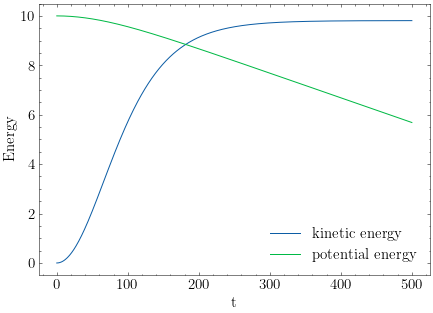

In [25]:
v_units = v*v_ter
t_units = g*t/v_ter
r_units = r*((v_ter**2)/g)

kinetic = 0.5*m*v_units**2
potential = r_units

plt.plot(v_units**2, label='kinetic energy')
plt.plot(r, label='potential energy')
plt.xlabel('t')
plt.ylabel('Energy')
plt.legend()
plt.show()

## Comparing erros by changing dt

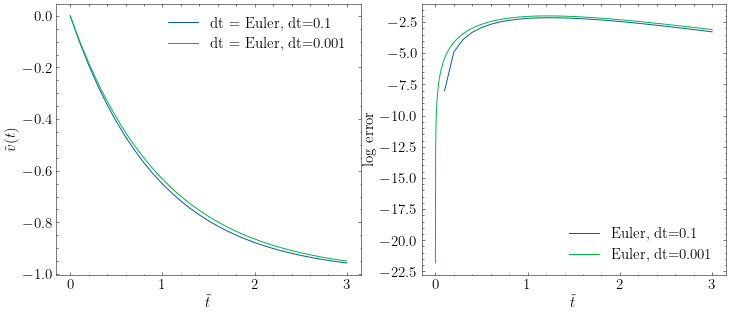

In [26]:
def f_linear(r, v, t):
    return -(1 + v)

def solver_ode(f, r, v, t, dt):
    N = len(t)
    for i in range(N-1):
        v[i+1] = v[i] + f(r[i], v[i], t[i])*dt
        r[i+1] = r[i] + v[i+1]*dt
    return r, v

dt_1 = 0.1
dt_2 = 0.001

t_1 = np.arange(0, 3.0 + dt_1, dt_1)
t_2 = np.arange(0, 3.0 + dt_2, dt_2)

r_1 = np.zeros(len(t_1))
r_2 = np.zeros(len(t_2))
v_1 = np.zeros(len(t_1))
v_2 = np.zeros(len(t_2))


r1, v1 = solver_ode(f_linear, r_1, v_1, t_1, dt_1)
r2, v2 = solver_ode(f_linear, r_2, v_2, t_2, dt_2)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(t_1, v1,label="dt = Euler, dt=0.1")
plt.plot(t_2, v2,label="dt = Euler,  dt=0.001")
plt.xlabel(r'$\tilde{t}$')
plt.ylabel(r'$\tilde{v}(t)$')
plt.legend()

plt.subplot(1,2,2)
plt.plot(t_1[1:], np.log(np.abs(v1[1:] - v_quad_exact(t_1, vy0)[1:])), label="Euler, dt=0.1")
plt.plot(t_2[1:], np.log(np.abs(v2[1:] - v_quad_exact(t_2, vy0)[1:])), label="Euler, dt=0.001")
plt.xlabel(r'$\tilde{t}$')
plt.ylabel('log error')
plt.legend()
plt.show()

plt.show()

## Second order Runge-Kutta

Until now, we are approximating our slope at the start or the end of the timestep. A better approximation is to use the midpoint:

\begin{equation}
x(t+h) = x(t) + h\, f \left(x(t+h/2), t+ h/2  \right).
\end{equation}

Since we don't know $x(t+h/2)$, use Euler's method:

\begin{equation}
x(t+h/2) = x(t) + \frac{h}{2} \, f \left(x(t),t \right).
\end{equation}

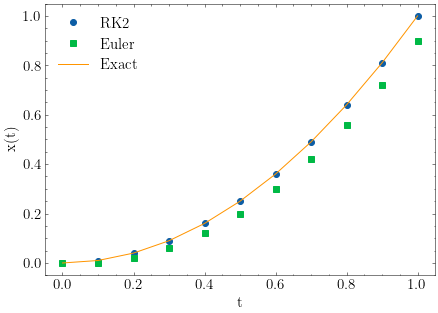

In [27]:
# Implementing RK2 and comparing to Euler

dt = 0.1
t = np.arange(0, 1.0 + dt, dt)
x0 = 0.0

def f(x, t):
    """Dummy function to be integrated. Expecting t**2."""
    return 2*t


def rk2(f, t, dt, x0):
    N = len(t)
    x = np.zeros(N)
    x[0] = x0
    
    for i in range(N-1):
        k1 = f(x[i], t[i])
        k2 = f(x[i] + 0.5*dt*k1, t[i] + 0.5*dt)
        x[i+1] = x[i] + dt*k2
    return x


def euler(f, t, dt, x0):
    N = len(t)
    x = np.zeros(N)
    x[0] = x0
    
    for i in range(N-1):
        x[i+1] = x[i] + dt*f(x[i], t[i])
    return x


x_rk2 = rk2(f, t, dt, x0)
x_euler = euler(f, t, dt, x0)

plt.plot(t, x_rk2, linestyle='', marker='o', label="RK2")
plt.plot(t, x_euler, linestyle='', marker='s', label="Euler")
plt.plot(t, t**2, label="Exact")
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

## Predictor-corrector method

In [28]:
# Trapezoidal rule for integration

def f(x):
    return x**2

dx = 0.01
x = np.arange(0, 1.0+dx, dx)

trapz_int = 0.0

for i in range(len(x)-1):
    trapz_int += (f(x[i]) + f(x[i+1]))*0.5*dx


# Scipy version

from scipy import integrate
scipy_int = integrate.trapz(f(x), x)    
    
print("Our result is: ", trapz_int)
print("Scipy trapz result: ", scipy_int)

Our result is:  0.33335
Scipy trapz result:  0.33335000000000004


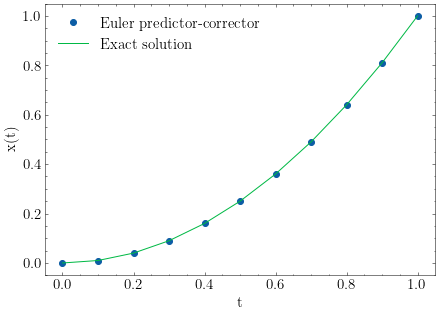

In [29]:
dt = 0.1
t = np.arange(0, 1.0 + dt, dt)
N = len(t)

def f(x, t):
    """Dummy function to be integrated."""
    return 2*t + 0*x

x = np.zeros(N)
x0 = 0.0
x[0] = x0

def euler_trapz(f, x, t):
    for i in range(N-1):
        x_guess = x[i] + dt*f(x[i], t[i])
        x[i+1] = x[i] + 0.5*dt*(f(x[i], t[i]) + f(x_guess, t[i+1]))
    return x

def f_exact(t):
    return t**2


x_euler_trapz = euler_trapz(f, x, t)

plt.plot(t, x_euler_trapz, marker='o', linestyle='', label='Euler predictor-corrector')
plt.plot(t, f_exact(t), label='Exact solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

## Packing methods

In [30]:
# Packing and organizing functions

def euler(f, x, t, dt):
    """Compute the next step using Euler's Method."""
    x = x + dt*f(x, t)
    return x

def rk2(f, x, t, dt):
    """Compute the next step using RK2."""
    k1 = f(x, t)
    k2 = f(x + 0.5*dt*k1, t + 0.5*dt)
    x = x + dt*k2
    return x

def euler_predictor_corrector(f, x, t, dt):
    """Compute the next step using Euler's Method."""
    x_guess = x + dt*f(x, t)
    x = x + 0.5*dt*(f(x, t) + f(x_guess, t+dt))
    return x

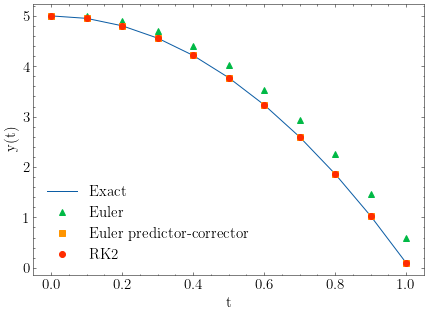

In [31]:
dt = 0.1
t = np.arange(0, 1.0 + dt, dt)
v0 = 0.0
y0 = 5.0

def f(v_y, t):
    g = 9.81
    v, y = v_y
    dv_dt = -g
    dy_dt = v
    return np.array([dv_dt, dy_dt])

def y_exact(t):
    return 5 - 0.5*9.81*t**2


def solve_ode(method, v0, y0, t, dt):
    N = len(t)
    y = np.zeros(N)
    v = np.zeros(N)
    y[0] = y0
    v[0] = v0
    
    for i in range(N-1):
        v[i+1], y[i+1] = method(f, (v[i], y[i]), t[i], dt)
    return (v, y)

v_euler, y_euler = solve_ode(euler, v0, y0, t, dt)
v_euler_p, y_euler_p = solve_ode(euler_predictor_corrector, v0, y0, t, dt)
v_rk2, y_rk2 = solve_ode(rk2, v0, y0, t, dt)

plt.plot(t, y_exact(t), label='Exact')
plt.plot(t, y_euler, marker='^', linestyle='', label='Euler')
plt.plot(t, y_euler_p, marker='s', linestyle='', label='Euler predictor-corrector')
plt.plot(t, y_rk2, marker='o', linestyle='', label='RK2')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.show()

## I/O

In [32]:
# Implementing io

# np.savetxt("r_rk2.txt", r_rk2[0:5], header=time.ctime())
# np.loadtxt("r_rk2.txt")